# telecom_churn

Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# CHECKING THE DATA ROWS AND COLUMNS

In [3]:
df=pd.read_csv("telecom_churn.csv")

In [4]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [5]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [6]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

DATA HAS 21 DATA COLUMNS UNDER DIFFERENT CATEGORIES THEY ARE 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

DATA SET COLUMNS DIDNT HAVE NULL VALUES IN COLUMNS

<AxesSubplot:>

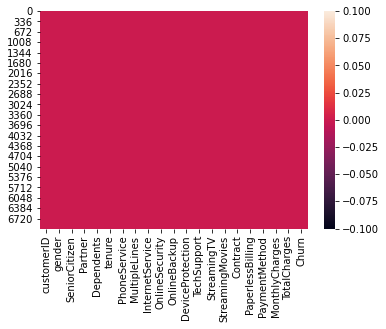

In [10]:
sns.heatmap(df.isnull())

FROM PLOT IT IS CLEAR THAT THERE IS NO NULL VALUES IN ANY COLUMNS

# EDA

# ANALYSING TARGET VARIABLE

OUR TARGET IS CHURN COLUMN WE WANT TO ANALYSE TARGET

In [11]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

No     5174
Yes    1869
Name: Churn, dtype: int64


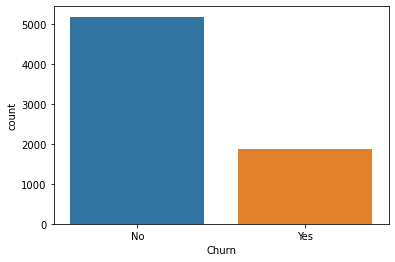

In [12]:
sns.countplot(df['Churn'])
print(df["Churn"].value_counts())

ORU TARGET CKURN CONTAINS ONLY TWO DIFFERENT CLASSES OF VARIABLES,, BUT TARGET IS NOT AT ALL BALANCED

In [13]:
CHURN_count = df.groupby('Churn')['Churn'].count()

([<matplotlib.patches.Wedge at 0x7f90139fe2e0>,
 [Text(-0.7393678277834755, 0.8144539368428058, '0'),
  Text(0.7393677515287918, -0.8144540060674139, '1')])

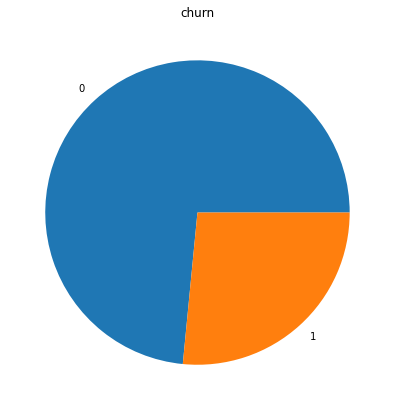

In [14]:
plt.figure(figsize=(7,7))
plt.title("churn")
plt.pie(CHURN_count.values, labels=[0, 1])

PIE CHART CLEARLY CONVEYS THE IN BALANCE CLASSES IN THE TARGET

# FEATURE COLUMNS:UNIVARIATE ANALYSIS

 COUNT PLOTS:THE OBJECT DTYPES COLUMNS ARE ANALYSE BY COUNT PLOTS

No     3641
Yes    3402
Name: Partner, dtype: int64


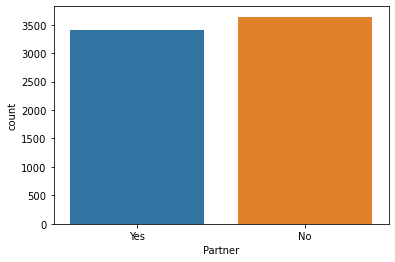

In [15]:
sns.countplot(df['Partner'])
print(df["Partner"].value_counts())

Partner COLUMN HAS TWO VALUES No     3641,,Yes    3402

No     4933
Yes    2110
Name: Dependents, dtype: int64


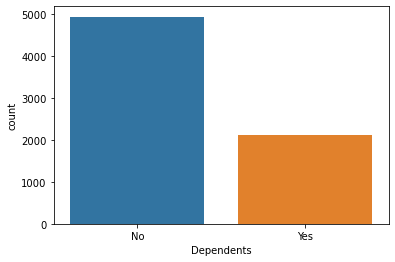

In [16]:
sns.countplot(df['Dependents'])
print(df["Dependents"].value_counts())

DEPENDENTS COLUMN ALSO HAVE TWO ENTRIES YES AND NO

Yes    6361
No      682
Name: PhoneService, dtype: int64


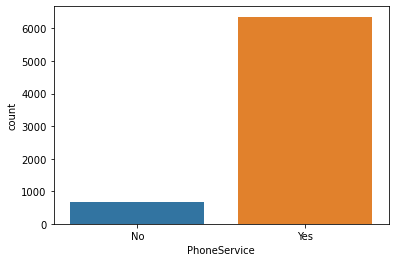

In [17]:
sns.countplot(df['PhoneService'])
print(df["PhoneService"].value_counts())

PhoneService ALSO CONTAINS YES AND NO ,HERE NO IS VERY LESS MOST HAVE CONNECTION OF PHON SERVICE

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


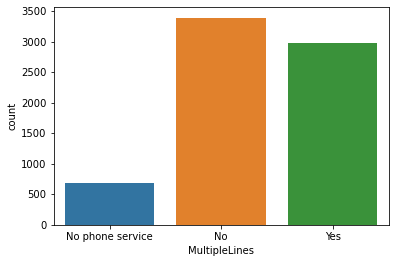

In [18]:
sns.countplot(df['MultipleLines'])
print(df["MultipleLines"].value_counts())

No                  3390,Yes                 2971,No phone service     682,THESE ARE THE THREE ENTRIES IN MULTIPLE LINES

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


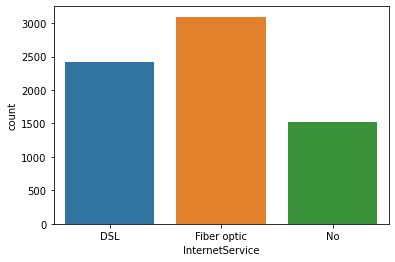

In [19]:
sns.countplot(df['InternetService'])
print(df["InternetService"].value_counts())

TYPES OF INTERNET CONNECTION SERVICE IS EXPLAINING THIS PLOT MOST PERSON USING FIBER OPTICS, SOME USING DSL, OTHERS ARE NOT USING IT

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


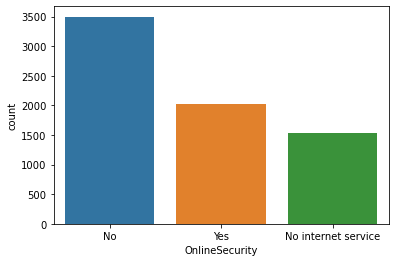

In [20]:
sns.countplot(df['OnlineSecurity'])
print(df["OnlineSecurity"].value_counts())

OnlineSecurity COLUMN HAS THREE ENTRIES No=3498,Yes=2019,No internet service  =  1526

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


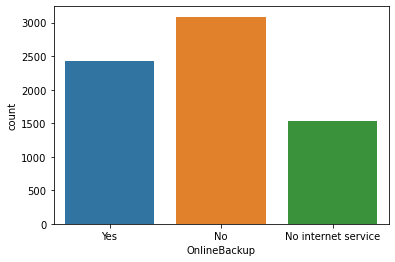

In [21]:
sns.countplot(df['OnlineBackup'])
print(df["OnlineBackup"].value_counts())

OnlineBackup HAS THREE DIFFERENT INFORMATION TYPE

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


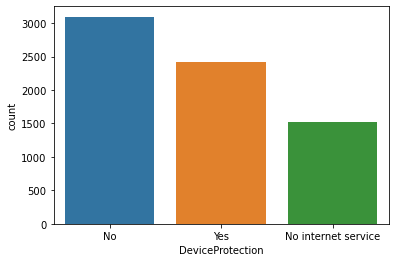

In [22]:
sns.countplot(df['DeviceProtection'])
print(df["DeviceProtection"].value_counts())

DeviceProtection DETAILS ARE CONVEYING THE PLOT,MOST OF THEM DONT HAVE PROTECTION

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


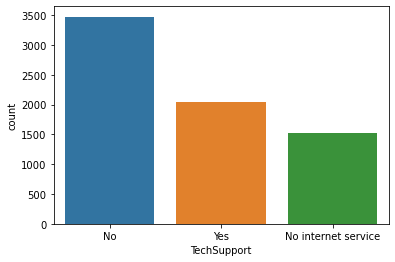

In [23]:
sns.countplot(df['TechSupport'])
print(df["TechSupport"].value_counts())

TechSupport HAS TWO DIFFERENT ENTRIES,NO TECH SERVICE COUNT IS HIGH

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


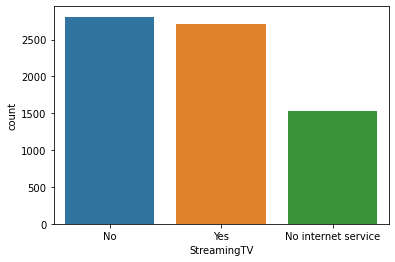

In [24]:
sns.countplot(df['StreamingTV'])
print(df["StreamingTV"].value_counts())

StreamingTV ALSO HAVE HIGH NO ENTRY BUT ALMOST EQUAL YES ENTRY

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


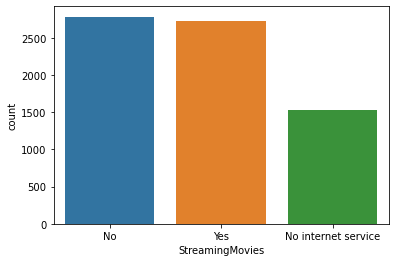

In [25]:
sns.countplot(df['StreamingMovies'])
print(df["StreamingMovies"].value_counts())

StreamingMovies HAVE ALMOST EQUAL YES AND NO COUNTS

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


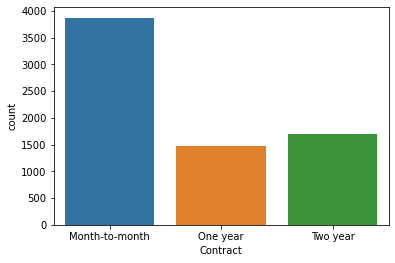

In [26]:
sns.countplot(df['Contract'])
print(df["Contract"].value_counts())

MOST Contract IS MONTH TO MONTH,ONE YEAR CONTACT IS LEAST IN NUMBER

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


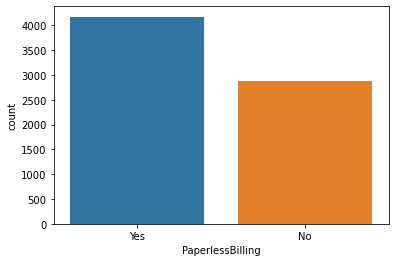

In [27]:
sns.countplot(df['PaperlessBilling'])
print(df["PaperlessBilling"].value_counts())

PaperlessBilling IS MOST PEOPLE PREFERING

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


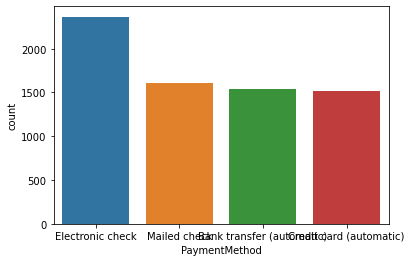

In [28]:
sns.countplot(df['PaymentMethod'])
print(df["PaymentMethod"].value_counts())

Electronic check             2365,Mailed check                 1612,Bank transfer (automatic)    1544Credit card (automatic)      1522 ARE THE DIFFERENT ENTRIES

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


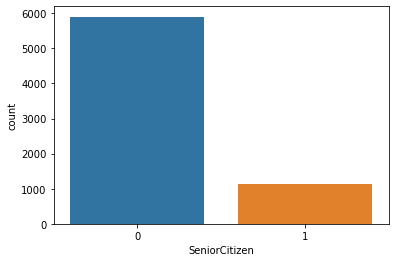

In [31]:
sns.countplot(df['SeniorCitizen'])
print(df["SeniorCitizen"].value_counts())

AROUND 20% PERSONS ARE SENIORCITIZEN

# DISTRIBUTION PLOT

<AxesSubplot:xlabel='tenure', ylabel='Density'>

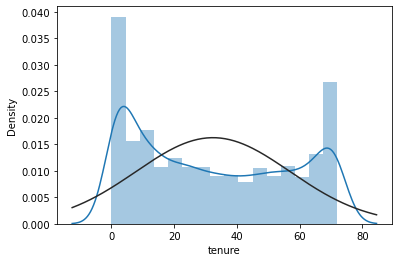

In [32]:
sns.distplot(df['tenure'],fit=norm)

TENURE VALUES HAVE NO NORMAL DISTRIBUTION PEAK VALUES AND SKEWNESS IS THERE

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

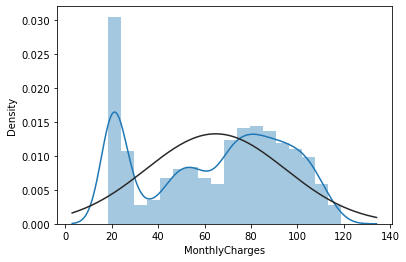

In [35]:
sns.distplot(df['MonthlyCharges'],fit=norm)

MonthlyCharges IS NOT NORMALLY DISTRIBUTED,SKEWNES PRESENCE IS THERE

# bivariate analysis

<AxesSubplot:title={'center':'comparison of SeniorCitizen AND TechSupport'}, xlabel='SeniorCitizen', ylabel='TechSupport'>

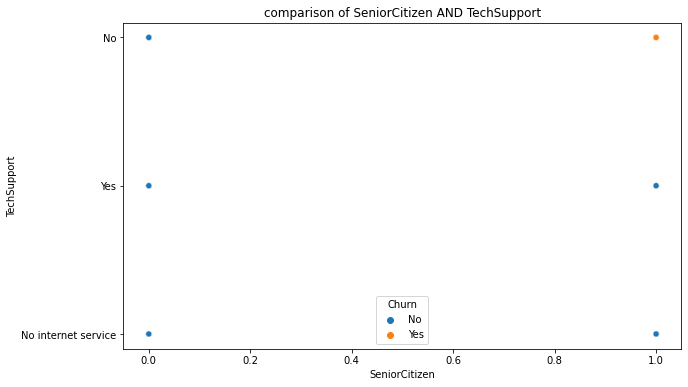

In [36]:
plt.figure(figsize=[10,6])
plt.title('comparison of SeniorCitizen AND TechSupport')
sns.scatterplot(df['SeniorCitizen'],df['TechSupport'],hue=df['Churn'])

SENIOR CITIZEN IS MOSTLY USING TECH SUPPORT

<AxesSubplot:title={'center':'comparison ofInternetService  AND TotalCharges'}, xlabel='InternetService', ylabel='TotalCharges'>

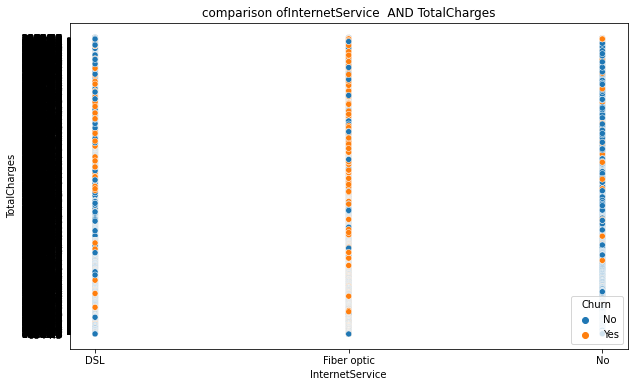

In [37]:
plt.figure(figsize=[10,6])
plt.title('comparison ofInternetService  AND TotalCharges')
sns.scatterplot(df['InternetService'],df['TotalCharges'],hue=df['Churn'])

in case of no internet service churn is not there,churn is more happening in fibre optic connection

<AxesSubplot:title={'center':'comparison of Contract AND MonthlyCharges'}, xlabel='Contract', ylabel='MonthlyCharges'>

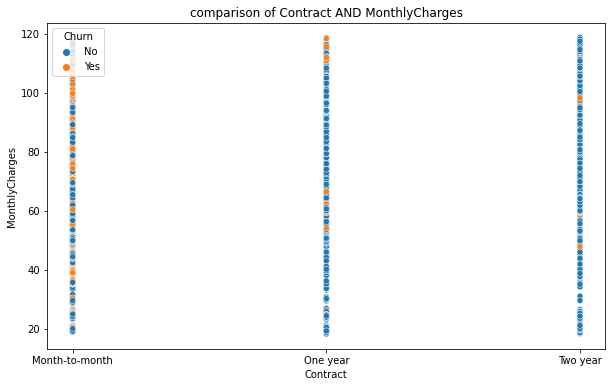

In [38]:
plt.figure(figsize=[10,6])
plt.title('comparison of Contract AND MonthlyCharges')
sns.scatterplot(df['Contract'],df['MonthlyCharges'],hue=df['Churn'])

in one and more years contracts churn is less, in month to month contract churn is high

<AxesSubplot:title={'center':'comparison of Dependents AND StreamingMovies'}, xlabel='Dependents', ylabel='StreamingMovies'>

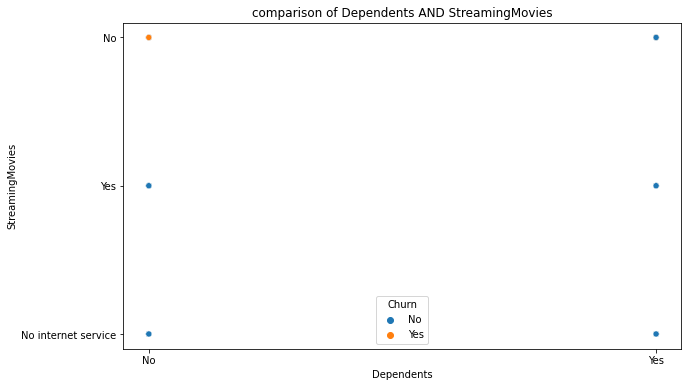

In [39]:
plt.figure(figsize=[10,6])
plt.title('comparison of Dependents AND StreamingMovies')
sns.scatterplot(df['Dependents'],df['StreamingMovies'],hue=df['Churn'])

in two cases ,that is dependents are there and not,streaming movie service is using and not using, but churn presence in more in no dependence case

<AxesSubplot:title={'center':'comparison of InternetService  AND PaymentMethod'}, xlabel='InternetService', ylabel='PaymentMethod'>

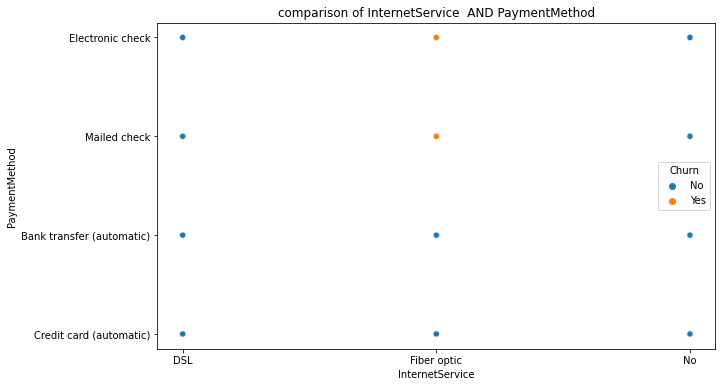

In [41]:
plt.figure(figsize=[10,6])
plt.title('comparison of InternetService  AND PaymentMethod')
sns.scatterplot(df['InternetService'],df['PaymentMethod'],hue=df['Churn'])

in different types internet services people using all payment methods 

<AxesSubplot:title={'center':'comparison of gender AND PaperlessBilling'}, xlabel='gender', ylabel='PaperlessBilling'>

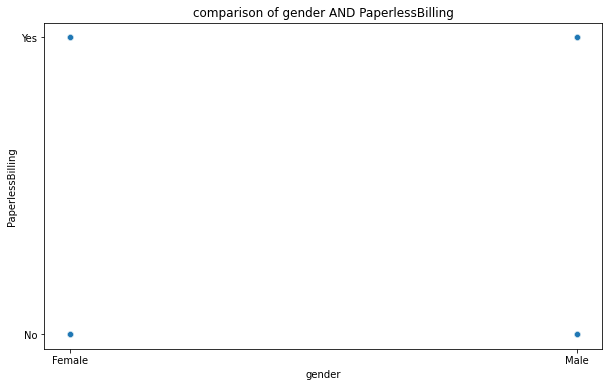

In [42]:
plt.figure(figsize=[10,6])
plt.title('comparison of gender AND PaperlessBilling')
sns.scatterplot(df['gender'],df['PaperlessBilling'])

with out gender discrimination both males and females supporting and rejecting paperless billing system

<AxesSubplot:title={'center':'comparison of OnlineSecurity AND gender'}, xlabel='OnlineSecurity', ylabel='gender'>

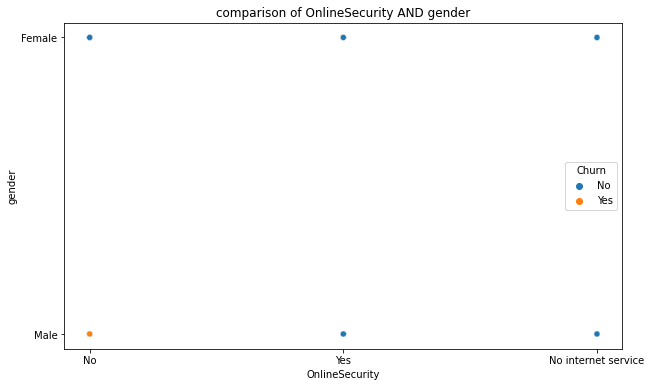

In [43]:
plt.figure(figsize=[10,6])
plt.title('comparison of OnlineSecurity AND gender')
sns.scatterplot(df['OnlineSecurity'],df['gender'],hue=df['Churn'])

both males and females prefering and negleting online security services

<AxesSubplot:title={'center':'comparison ofMonthlyCharges   AND TotalCharges'}, xlabel='MonthlyCharges', ylabel='TotalCharges'>

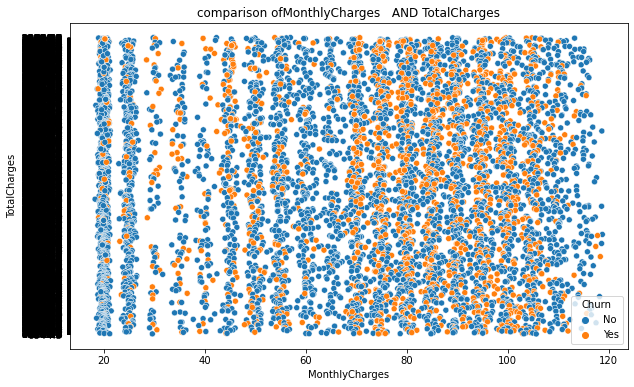

In [44]:
plt.figure(figsize=[10,6])
plt.title('comparison ofMonthlyCharges   AND TotalCharges')
sns.scatterplot(df['MonthlyCharges'],df['TotalCharges'],hue=df['Churn'])

from the plot it is clear that in higher level of monthly charges the churn rate is high

<AxesSubplot:title={'center':'comparison ofMonthlyCharges   AND tenure'}, xlabel='MonthlyCharges', ylabel='tenure'>

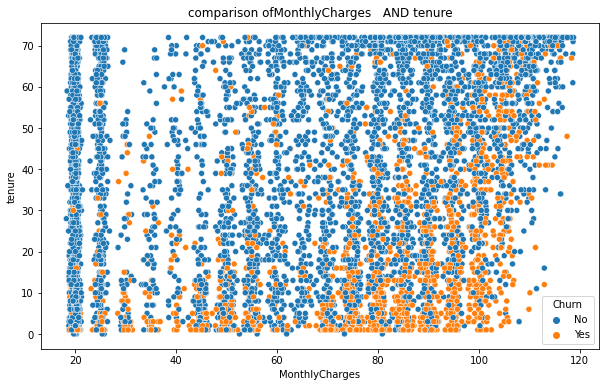

In [47]:
plt.figure(figsize=[10,6])
plt.title('comparison ofMonthlyCharges   AND tenure')
sns.scatterplot(df['MonthlyCharges'],df['tenure'],hue=df['Churn'])

churn is more happening in high monthly chagge area

# PLOTTING BOX PLOT FOR CHECKING OUTLIERS

<AxesSubplot:xlabel='tenure'>

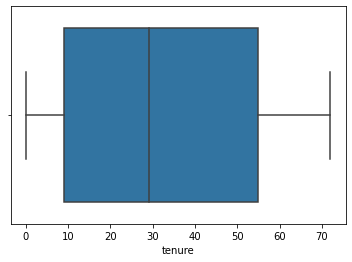

In [50]:
sns.boxplot(df['tenure'])

in tenure data there is no outliers

<AxesSubplot:xlabel='MonthlyCharges'>

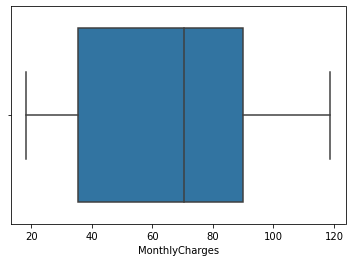

In [51]:
sns.boxplot(df['MonthlyCharges'])

in monthly charges also no outliers

# DATA PREPROCESSING

# ENCODING

In [53]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

from the dtypes list it is clear that most of the columns are object types so we need to encode it

In [54]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [55]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [56]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

all columns are converted ,now there is no object columns

In [57]:
df

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0         5375.0     0.0              0      1.0         0.0       1   
1         3962.0     1.0              0      0.0         0.0      34   
2         2564.0     1.0              0      0.0         0.0       2   
3         5535.0     1.0              0      0.0         0.0      45   
4         6511.0     0.0              0      0.0         0.0       2   
...          ...     ...            ...      ...         ...     ...   
7038      4853.0     1.0              0      1.0         1.0      24   
7039      1525.0     0.0              0      1.0         1.0      72   
7040      3367.0     0.0              0      1.0         1.0      11   
7041      5934.0     1.0              1      1.0         0.0       4   
7042      2226.0     1.0              0      0.0         0.0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0              0.0            1.0              0.0             0.0  ...   
1              1.0            0.0              0.0             2.0  ...   
2              1.0            0.0              0.0             2.0  ...   
3              0.0            1.0              0.0             2.0  ...   
4              1.0            0.0              1.0             0.0  ...   
...            ...            ...              ...             ...  ...   
7038           1.0            2.0              0.0             2.0  ...   
7039           1.0            2.0              1.0             0.0  ...   
7040           0.0            1.0              0.0             2.0  ...   
7041           1.0            2.0              1.0             0.0  ...   
7042           1.0            0.0              1.0             2.0  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                  0.0          0.0          0.0              0.0       0.0   
1                  2.0          0.0          0.0              0.0       1.0   
2                  0.0          0.0          0.0              0.0       0.0   
3                  2.0          2.0          0.0              0.0       1.0   
4                  0.0          0.0          0.0              0.0       0.0   
...                ...          ...          ...              ...       ...   
7038               2.0          2.0          2.0              2.0       1.0   
7039               2.0          0.0          2.0              2.0       1.0   
7040               0.0          0.0          0.0              0.0       0.0   
7041               0.0          0.0          0.0              0.0       0.0   
7042               2.0          2.0          2.0              2.0       2.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                  1.0            2.0           29.85        2505.0    0.0  
1                  0.0            3.0           56.95        1466.0    0.0  
2                  1.0            3.0           53.85         157.0    1.0  
3                  0.0            0.0           42.30        1400.0    0.0  
4                  1.0            2.0           70.70         925.0    1.0  
...                ...            ...             ...           ...    ...  
7038               1.0            3.0           84.80        1597.0    0.0  
7039               1.0            1.0          103.20        5698.0    0.0  
7040               1.0            2.0           29.60        2994.0    0.0  
7041               1.0            3.0           74.40        2660.0    1.0  
7042               1.0            0.0          105.65        5407.0    0.0  

[7043 rows x 21 columns]

In [59]:
df.describe()

customerID       gender  SeniorCitizen      Partner   Dependents  \
count  7043.000000  7043.000000    7043.000000  7043.000000  7043.000000   
mean   3521.000000     0.504756       0.162147     0.483033     0.299588   
std    2033.283305     0.500013       0.368612     0.499748     0.458110   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%    1760.500000     0.000000       0.000000     0.000000     0.000000   
50%    3521.000000     1.000000       0.000000     0.000000     0.000000   
75%    5281.500000     1.000000       0.000000     1.000000     1.000000   
max    7042.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  PhoneService  MultipleLines  InternetService  \
count  7043.000000   7043.000000    7043.000000      7043.000000   
mean     32.371149      0.903166       0.940508         0.872923   
std      24.559481      0.295752       0.948554         0.737796   
min       0.000000      0.000000       0.000000         0.000000   
25%       9.000000      1.000000       0.000000         0.000000   
50%      29.000000      1.000000       1.000000         1.000000   
75%      55.000000      1.000000       2.000000         1.000000   
max      72.000000      1.000000       2.000000         2.000000   

       OnlineSecurity  ...  DeviceProtection  TechSupport  StreamingTV  \
count     7043.000000  ...       7043.000000  7043.000000  7043.000000   
mean         0.790004  ...          0.904444     0.797104     0.985376   
std          0.859848  ...          0.879949     0.861551     0.885002   
min          0.000000  ...          0.000000     0.000000     0.000000   
25%          0.000000  ...          0.000000     0.000000     0.000000   
50%          1.000000  ...          1.000000     1.000000     1.000000   
75%          2.000000  ...          2.000000     2.000000     2.000000   
max          2.000000  ...          2.000000     2.000000     2.000000   

       StreamingMovies     Contract  PaperlessBilling  PaymentMethod  \
count      7043.000000  7043.000000       7043.000000    7043.000000   
mean          0.992475     0.690473          0.592219       1.574329   
std           0.885091     0.833755          0.491457       1.068104   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       1.000000   
50%           1.000000     0.000000          1.000000       2.000000   
75%           2.000000     1.000000          1.000000       2.000000   
max           2.000000     2.000000          1.000000       3.000000   

       MonthlyCharges  TotalCharges        Churn  
count     7043.000000   7043.000000  7043.000000  
mean        64.761692   3257.794122     0.265370  
std         30.090047   1888.693496     0.441561  
min         18.250000      0.000000     0.000000  
25%         35.500000   1609.000000     0.000000  
50%         70.350000   3249.000000     0.000000  
75%         89.850000   4901.500000     1.000000  
max        118.750000   6530.000000     1.000000  

[8 rows x 21 columns]

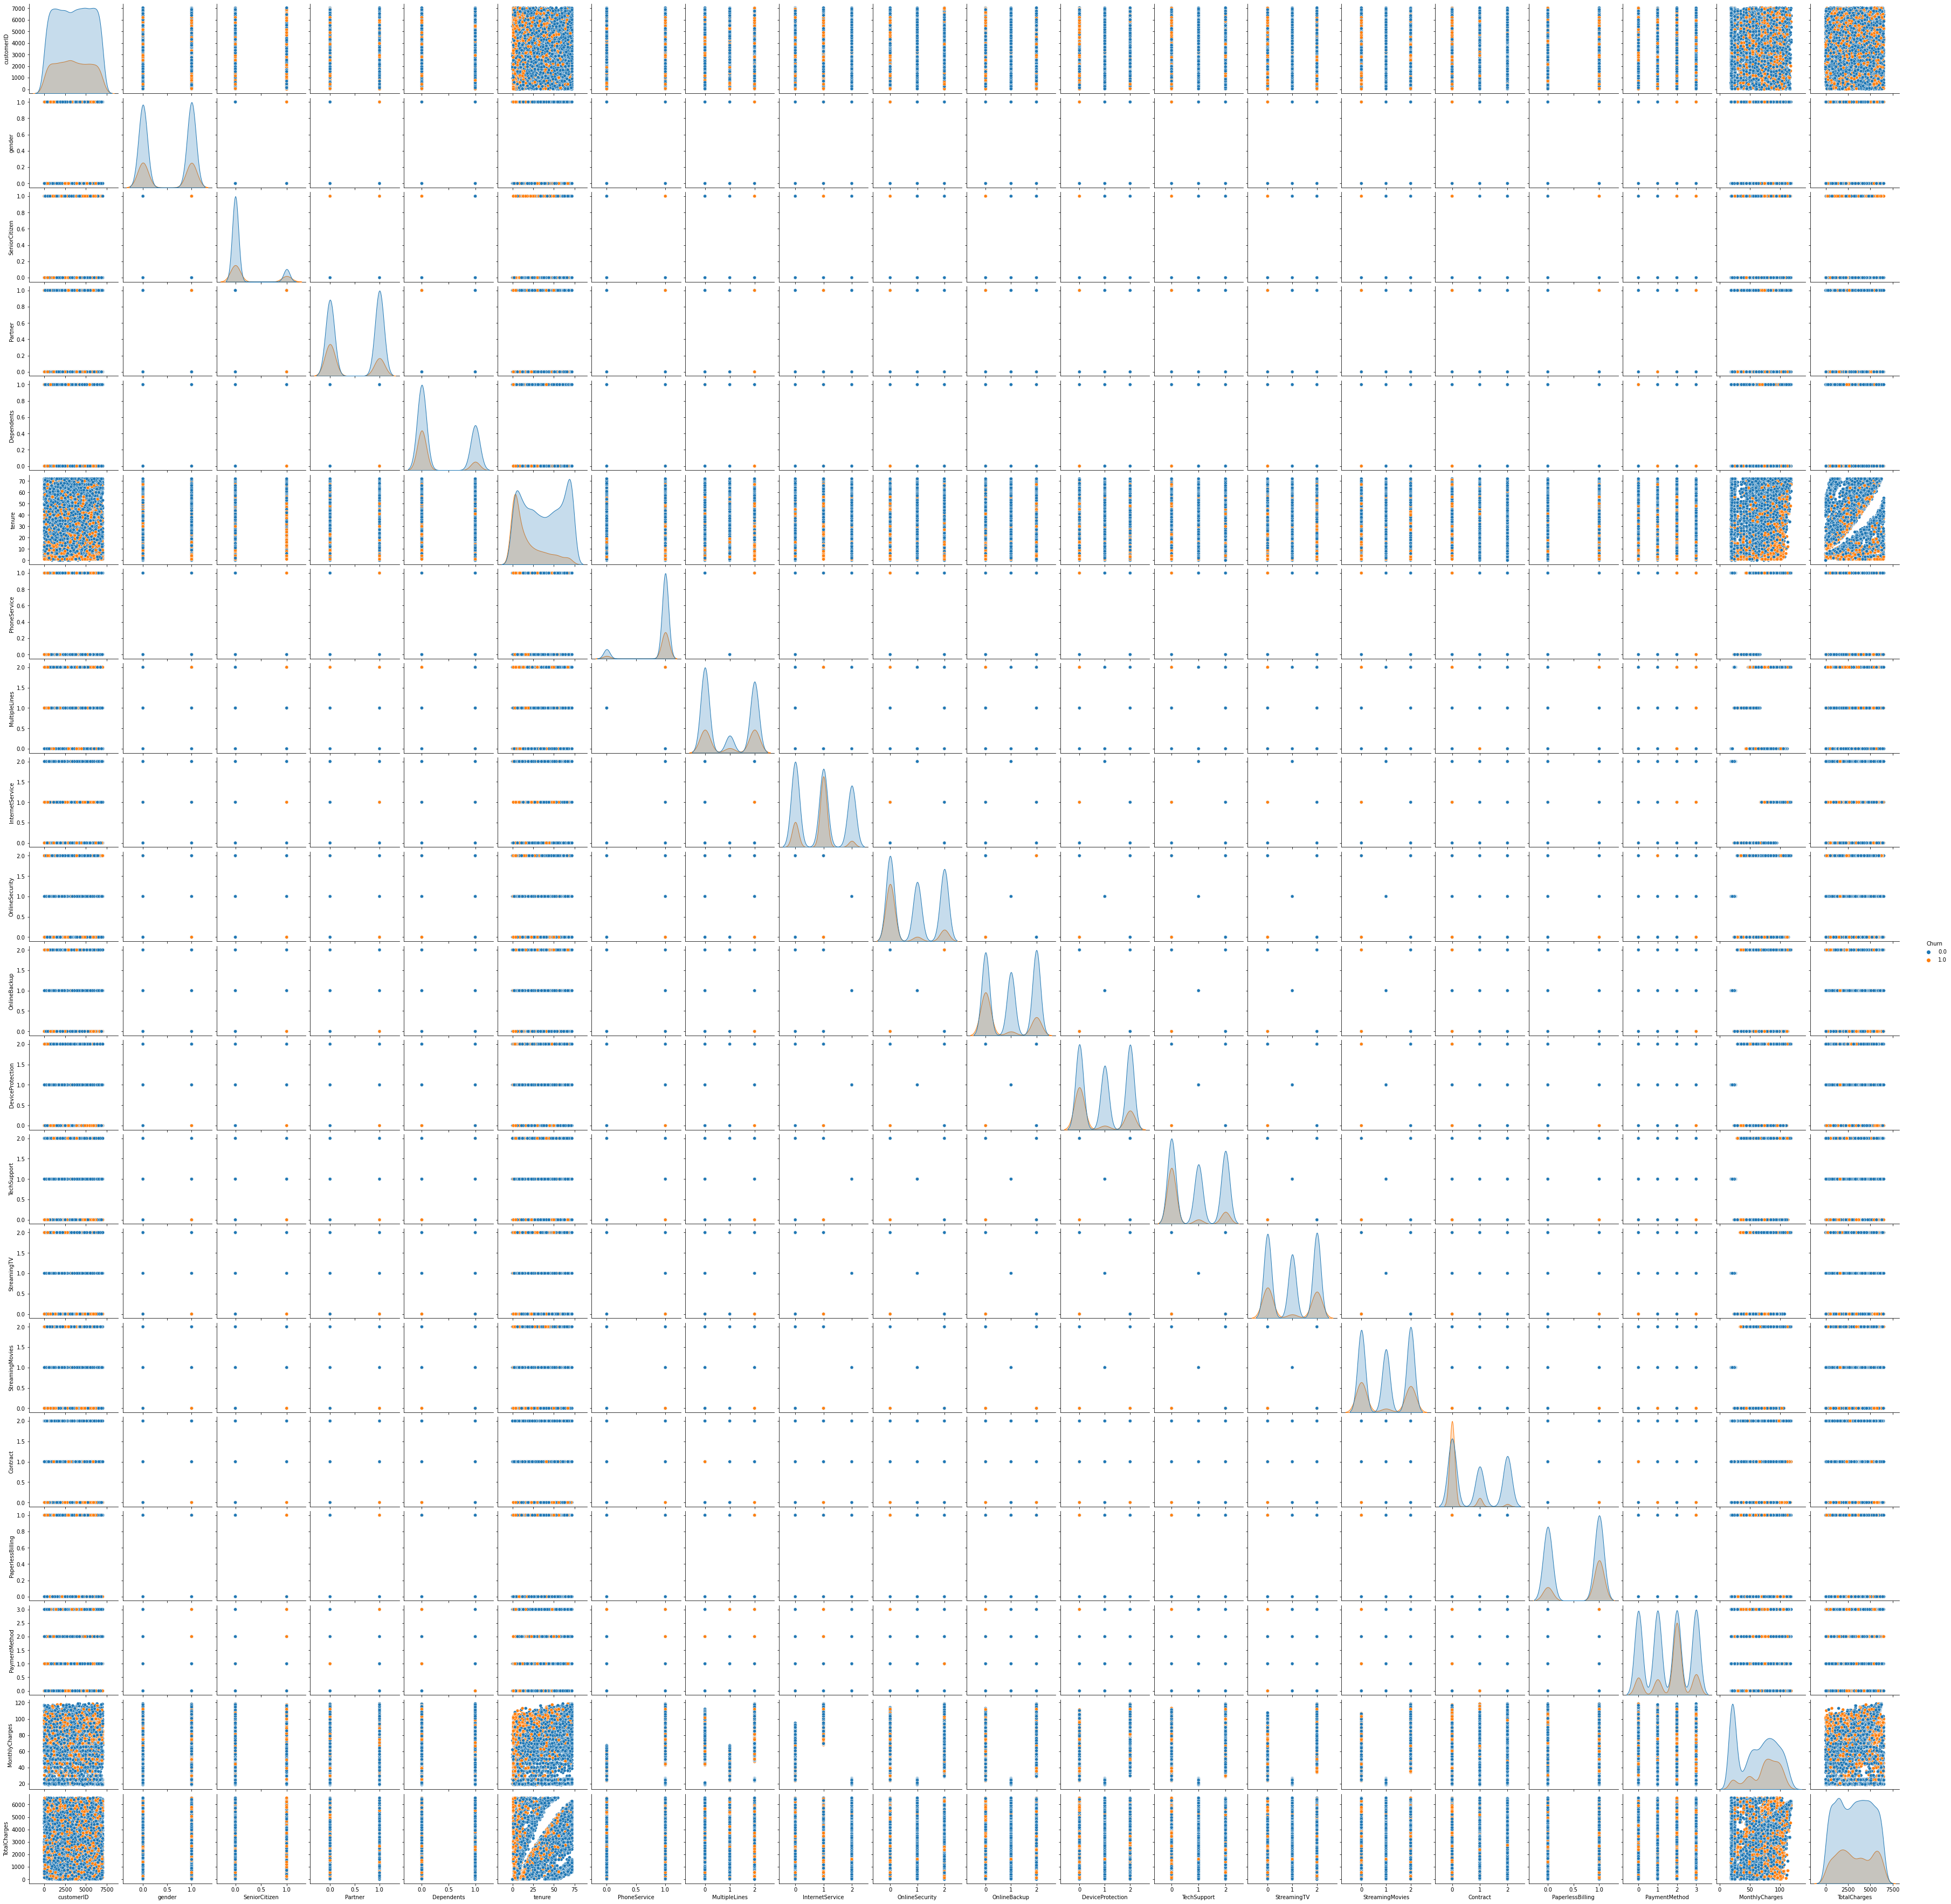

In [60]:
sns.pairplot(df,hue="Churn")

pairplot shows the relation among different columns

# TREATING OUTLIERS

OUTLIERS ARE NOT PRESENT IN THE ANALYSED COLUMNS,SO NO NEED OF TREATING OUTLIERS

# CORRELATION AND HEATMAP

In [62]:
cor=df.corr()

In [63]:
cor

customerID    gender  SeniorCitizen   Partner  Dependents  \
customerID          1.000000  0.006288      -0.002074 -0.026729   -0.012823   
gender              0.006288  1.000000      -0.001874 -0.001808    0.010517   
SeniorCitizen      -0.002074 -0.001874       1.000000  0.016479   -0.211185   
Partner            -0.026729 -0.001808       0.016479  1.000000    0.452676   
Dependents         -0.012823  0.010517      -0.211185  0.452676    1.000000   
tenure              0.008035  0.005106       0.016567  0.379697    0.159712   
PhoneService       -0.006483 -0.006488       0.008576  0.017706   -0.001762   
MultipleLines       0.004316 -0.006739       0.146185  0.142410   -0.024991   
InternetService    -0.012407 -0.000863      -0.032310  0.000891    0.044590   
OnlineSecurity      0.013292 -0.015017      -0.128221  0.150828    0.152166   
OnlineBackup       -0.003334 -0.012057      -0.013632  0.153130    0.091015   
DeviceProtection   -0.006918  0.000549      -0.021398  0.166330    0.080537   
TechSupport         0.001140 -0.006825      -0.151268  0.126733    0.133524   
StreamingTV        -0.007777 -0.006421       0.030776  0.137341    0.046885   
StreamingMovies    -0.016746 -0.008743       0.047266  0.129574    0.021321   
Contract            0.015028  0.000126      -0.142554  0.294806    0.243187   
PaperlessBilling   -0.001945 -0.011754       0.156530 -0.014877   -0.111377   
PaymentMethod       0.011604  0.017352      -0.038551 -0.154798   -0.040292   
MonthlyCharges     -0.003916 -0.014569       0.220173  0.096848   -0.113890   
TotalCharges        0.003027 -0.005291       0.037653  0.059568   -0.009572   
Churn              -0.017447 -0.008612       0.150889 -0.150448   -0.164221   

                    tenure  PhoneService  MultipleLines  InternetService  \
customerID        0.008035     -0.006483       0.004316        -0.012407   
gender            0.005106     -0.006488      -0.006739        -0.000863   
SeniorCitizen     0.016567      0.008576       0.146185        -0.032310   
Partner           0.379697      0.017706       0.142410         0.000891   
Dependents        0.159712     -0.001762      -0.024991         0.044590   
tenure            1.000000      0.008448       0.343032        -0.030359   
PhoneService      0.008448      1.000000      -0.020538         0.387436   
MultipleLines     0.343032     -0.020538       1.000000        -0.109216   
InternetService  -0.030359      0.387436      -0.109216         1.000000   
OnlineSecurity    0.325468     -0.015198       0.007141        -0.028416   
OnlineBackup      0.370876      0.024105       0.117327         0.036138   
DeviceProtection  0.371105      0.003727       0.122318         0.044944   
TechSupport       0.322942     -0.019158       0.011466        -0.026047   
StreamingTV       0.289373      0.055353       0.175059         0.107417   
StreamingMovies   0.296866      0.043870       0.180957         0.098350   
Contract          0.671607      0.002247       0.110842         0.099721   
PaperlessBilling  0.006152      0.016505       0.165146        -0.138625   
PaymentMethod    -0.370436     -0.004184      -0.176793         0.086140   
MonthlyCharges    0.247900      0.247398       0.433576        -0.323260   
TotalCharges      0.158523      0.083195       0.114955        -0.055724   
Churn            -0.352229      0.011942       0.038037        -0.047291   

                  OnlineSecurity  ...  DeviceProtection  TechSupport  \
customerID              0.013292  ...         -0.006918     0.001140   
gender                 -0.015017  ...          0.000549    -0.006825   
SeniorCitizen          -0.128221  ...         -0.021398    -0.151268   
Partner                 0.150828  ...          0.166330     0.126733   
Dependents              0.152166  ...          0.080537     0.133524   
tenure                  0.325468  ...          0.371105     0.322942   
PhoneService           -0.015198  ...          0.003727    -0.019158   
MultipleLines           0.0071

<AxesSubplot:>

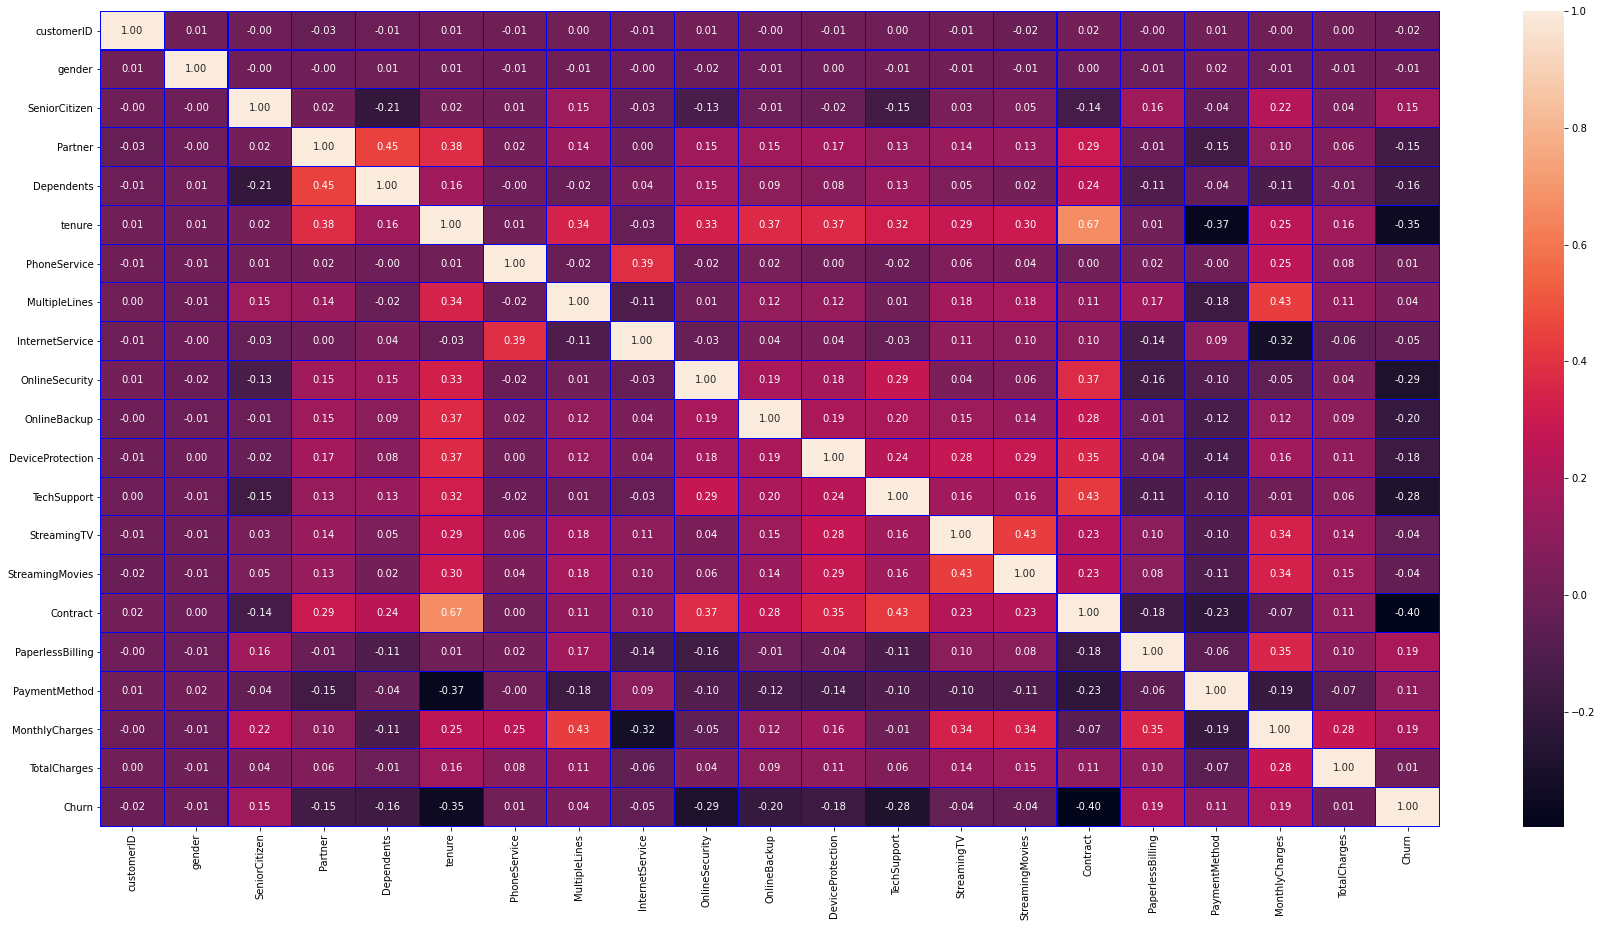

In [64]:
plt.figure(figsize=(30,15))
sns.heatmap(cor,annot=True,linewidths=0.1,linecolor="blue",fmt="0.2f")

heatmap clearley shows the negative correlation in some columns 

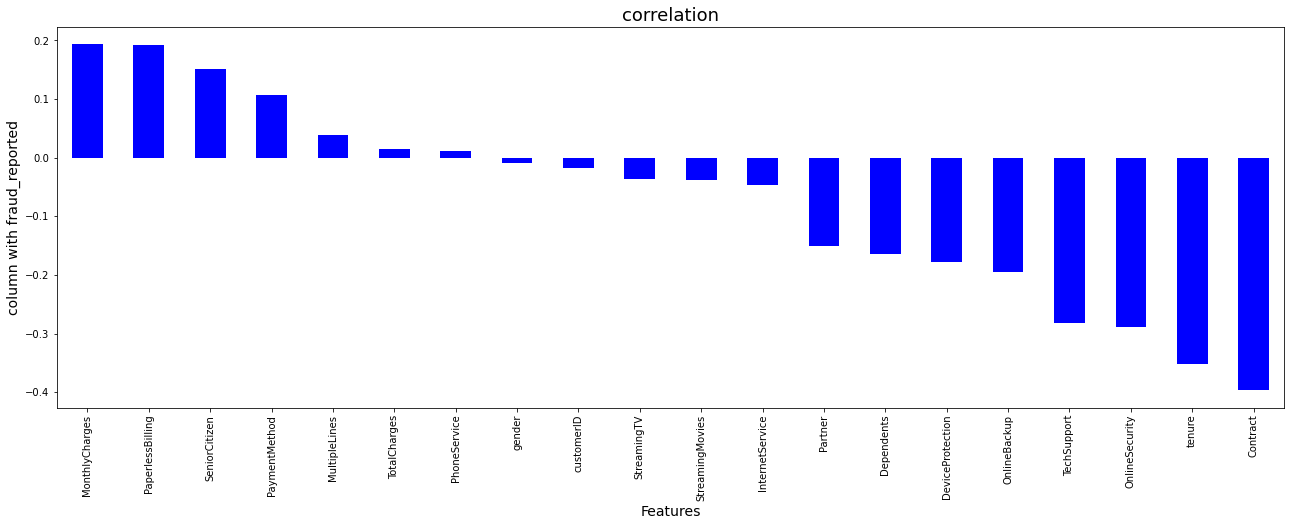

In [65]:
plt.figure(figsize=(22,7))
cor['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with fraud_reported',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

here we mannually dropping some columns for better results,here prefering most negatively corelated columns

In [66]:
df.drop(['Contract'],axis=1,inplace=True)
df.drop(['tenure'],axis=1,inplace=True)
df.drop(['OnlineSecurity'],axis=1,inplace=True)
df.drop(['TechSupport'],axis=1,inplace=True)

# SKEWNESS REMOVAL

In [67]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineBackup        0.182930
DeviceProtection    0.186847
StreamingTV         0.028486
StreamingMovies     0.014657
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

SeniorCitizen,PhoneService HAVING SKEWNESS HIGH VALUES

# HISTOGRAM CONVEYS THE SKEWNESS PRESENCE

<AxesSubplot:ylabel='Frequency'>

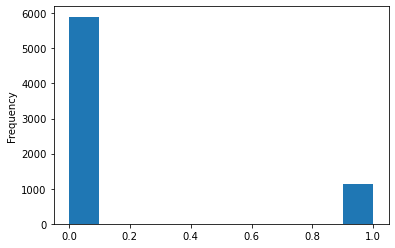

In [68]:
df['SeniorCitizen'].plot.hist()

SKEWNESS IS THERE IN COLUMN

<AxesSubplot:ylabel='Frequency'>

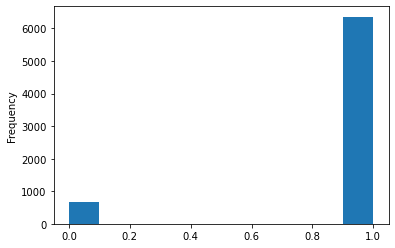

In [69]:
df['PhoneService'].plot.hist()

HERE ALSO SKEWNESS IS PRESENT

# SPLITTING X AND Y AND APPLYING POWER TRANSFORM FOR SKEWNES REMOVAL

In [70]:
from sklearn.preprocessing import PowerTransformer

In [72]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [73]:
x

customerID  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0         5375.0     0.0              0      1.0         0.0           0.0   
1         3962.0     1.0              0      0.0         0.0           1.0   
2         2564.0     1.0              0      0.0         0.0           1.0   
3         5535.0     1.0              0      0.0         0.0           0.0   
4         6511.0     0.0              0      0.0         0.0           1.0   
...          ...     ...            ...      ...         ...           ...   
7038      4853.0     1.0              0      1.0         1.0           1.0   
7039      1525.0     0.0              0      1.0         1.0           1.0   
7040      3367.0     0.0              0      1.0         1.0           0.0   
7041      5934.0     1.0              1      1.0         0.0           1.0   
7042      2226.0     1.0              0      0.0         0.0           1.0   

      MultipleLines  InternetService  OnlineBackup  DeviceProtection  \
0               1.0              0.0           2.0               0.0   
1               0.0              0.0           0.0               2.0   
2               0.0              0.0           2.0               0.0   
3               1.0              0.0           0.0               2.0   
4               0.0              1.0           0.0               0.0   
...             ...              ...           ...               ...   
7038            2.0              0.0           0.0               2.0   
7039            2.0              1.0           2.0               2.0   
7040            1.0              0.0           0.0               0.0   
7041            2.0              1.0           0.0               0.0   
7042            0.0              1.0           0.0               2.0   

      StreamingTV  StreamingMovies  PaperlessBilling  PaymentMethod  \
0             0.0              0.0               1.0            2.0   
1             0.0              0.0               0.0            3.0   
2             0.0              0.0               1.0            3.0   
3             0.0              0.0               0.0            0.0   
4             0.0              0.0               1.0            2.0   
...           ...              ...               ...            ...   
7038          2.0              2.0               1.0            3.0   
7039          2.0              2.0               1.0            1.0   
7040          0.0              0.0               1.0            2.0   
7041          0.0              0.0               1.0            3.0   
7042          2.0              2.0               1.0            0.0   

      MonthlyCharges  TotalCharges  
0              29.85        2505.0  
1              56.95        1466.0  
2              53.85         157.0  
3              42.30        1400.0  
4              70.70         925.0  
...              ...           ...  
7038           84.80        1597.0  
7039          103.20        5698.0  
7040           29.60        2994.0  
7041           74.40        2660.0  
7042          105.65        5407.0  

[7043 rows x 16 columns]

In [74]:
x.shape

(7043, 16)

In [75]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7043, dtype: float64

In [76]:
y.shape

(7043,)

In [77]:
pt=PowerTransformer(method="yeo-johnson")

In [78]:
X_power=pt.fit_transform(x)

In [79]:
df1=pd.DataFrame(X_power,columns=x.columns)

In [80]:
df1.skew()

customerID         -0.290930
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
PhoneService       -2.727153
MultipleLines       0.033697
InternetService    -0.072384
OnlineBackup       -0.001417
DeviceProtection    0.001051
StreamingTV        -0.097211
StreamingMovies    -0.105641
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.290854
dtype: float64

columns still have skewness so we are going to reduce it

In [82]:
from scipy import sqrt

In [83]:
df1["SeniorCitizen"]=np.sqrt(df1["SeniorCitizen"])
df1["PhoneService"]=np.sqrt(df1["PhoneService"])

In [84]:
df1.skew()

customerID         -0.290930
gender             -0.019031
SeniorCitizen       0.000000
Partner             0.067922
Dependents          0.875199
PhoneService        0.000000
MultipleLines       0.033697
InternetService    -0.072384
OnlineBackup       -0.001417
DeviceProtection    0.001051
StreamingTV        -0.097211
StreamingMovies    -0.105641
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.290854
dtype: float64

In [85]:
df1["Dependents"]=np.sqrt(df1["Dependents"])

In [86]:
df1.skew()

customerID         -0.290930
gender             -0.019031
SeniorCitizen       0.000000
Partner             0.067922
Dependents          0.000000
PhoneService        0.000000
MultipleLines       0.033697
InternetService    -0.072384
OnlineBackup       -0.001417
DeviceProtection    0.001051
StreamingTV        -0.097211
StreamingMovies    -0.105641
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.290854
dtype: float64

skewness is removed successfully,we can check that with histogram

<AxesSubplot:ylabel='Frequency'>

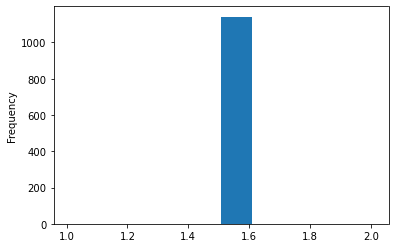

In [87]:
df1['SeniorCitizen'].plot.hist()

skewness is treated

<AxesSubplot:ylabel='Frequency'>

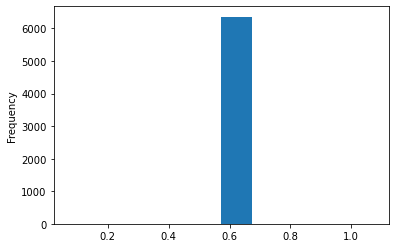

In [88]:
df1['PhoneService'].plot.hist()

here also skewness removed

# SAMPLING TARGET

OUR TARGET COLUMN VARIABLES ARE NOT IN BALANCED,imbalanced counts for classes are there

0.0    5174
1.0    1869
Name: Churn, dtype: int64


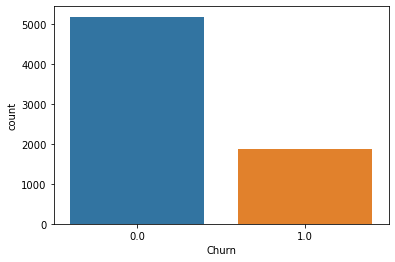

In [89]:
sns.countplot(df['Churn'])
print(df["Churn"].value_counts())

it is clear that data is not balanced so we want to balance it

# HERE PREFERING SMOTE OR OVERSAMPLING

In [90]:
from imblearn.over_sampling import SMOTE

In [91]:
sm=SMOTE()

In [92]:
x1,y1=sm.fit_resample(x,y)

In [93]:
y1

0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
10343    1.0
10344    1.0
10345    1.0
10346    1.0
10347    1.0
Name: Churn, Length: 10348, dtype: float64

In [94]:
y1.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

datas are balanced in target

# MULTICOLLINEARITY

VIF HELP TO FIND THE MULTICOLLINEARITY

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
    vif['Features']=x1.columns
    print(vif)

In [98]:
vif_calc()

    VIF Factor          Features
0     3.558973        customerID
1     2.046939            gender
2     1.248682     SeniorCitizen
3     2.550085           Partner
4     1.849539        Dependents
5    16.368154      PhoneService
6     2.792837     MultipleLines
7     4.498032   InternetService
8     2.060615      OnlineBackup
9     2.269077  DeviceProtection
10    3.239526       StreamingTV
11    3.237682   StreamingMovies
12    3.389309  PaperlessBilling
13    3.360891     PaymentMethod
14   17.023457    MonthlyCharges
15    4.012104      TotalCharges


there is no high vif values in the data columns

# SCALING FEATURES

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
sc=StandardScaler()

In [101]:
x1=sc.fit_transform(x1)

In [102]:
x1

array([[ 0.92201364, -1.06203887, -0.3914556 , ...,  0.37140052,
        -1.37130086, -0.40593269],
       [ 0.22575661,  1.05288928, -0.3914556 , ...,  1.39397829,
        -0.39567838, -0.95170005],
       [-0.46310915,  1.05288928, -0.3914556 , ...,  1.39397829,
        -0.50728095, -1.63929338],
       ...,
       [-1.43403898,  1.05288928, -0.3914556 , ..., -0.40502019,
        -0.04047624, -1.29579888],
       [ 0.24638278,  1.05288928, -0.3914556 , ...,  1.00243874,
        -0.82064212,  0.28109044],
       [ 0.89861315,  1.05288928, -0.3914556 , ...,  0.341957  ,
         0.98940828, -1.57238195]])

# SPLITTING AND APPLYING ALGORITHMS

WE HAVE x1 and y1 ,so now we want to perform train-test split

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=15)

In [105]:
x_train.shape

(7243, 16)

In [106]:
y_train.shape

(7243,)

In [107]:
x_test.shape

(3105, 16)

In [108]:
y_test.shape

(3105,)

# LOGISTIC REGRESSION

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [110]:
lg=LogisticRegression()

In [111]:
lg.fit(x_train,y_train)

LogisticRegression()

In [112]:
pred=lg.predict(x_test)

In [113]:
print(pred)

[0. 1. 0. ... 1. 1. 1.]


# ACCURACY SCORE,CONFUSION MATRIX,CLASSIFICATION REPORT

In [114]:
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred)) 

Accuracy score: 0.7085346215780999
[[1072  514]
 [ 391 1128]]
              precision    recall  f1-score   support

         0.0       0.73      0.68      0.70      1586
         1.0       0.69      0.74      0.71      1519

    accuracy                           0.71      3105
   macro avg       0.71      0.71      0.71      3105
weighted avg       0.71      0.71      0.71      3105



# AUC-ROC CURVE

In [116]:
from sklearn.metrics import roc_curve

In [117]:
from sklearn.metrics import roc_auc_score

In [118]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [119]:
y_pred_prob

array([0.4989444 , 0.60952448, 0.37357562, ..., 0.82337197, 0.68125351,
       0.61322255])

In [120]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [121]:
fpr

array([0.00000000e+00, 6.30517024e-04, 1.89155107e-03, ...,
       9.98738966e-01, 9.98738966e-01, 1.00000000e+00])

In [122]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99934167, 1.        ,
       1.        ])

In [123]:
thresholds

array([1.93429466, 0.93429466, 0.91768245, ..., 0.04200999, 0.0419618 ,
       0.03898374])

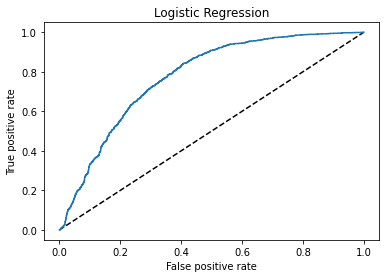

In [124]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic Regression")
plt.show()

# DECISION TREE CLASSSIFIER

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
dtc=DecisionTreeClassifier()

In [127]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [128]:
dtc.score(x_train,y_train)

1.0

In [129]:
preddtc=dtc.predict(x_test)

In [130]:
print(preddtc)

[1. 1. 1. ... 1. 0. 0.]


# accuracy score ,confusion matrix,classification report

In [131]:
accdtc=classification_report(y_test,preddtc)

In [132]:
print(accdtc)

              precision    recall  f1-score   support

         0.0       0.80      0.77      0.79      1586
         1.0       0.77      0.80      0.79      1519

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



In [133]:
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

[[1224  362]
 [ 302 1217]]
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.79      1586
         1.0       0.77      0.80      0.79      1519

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



# AUC ROC CURVE

In [134]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]

In [135]:
y_pred_prob

array([1., 1., 1., ..., 1., 0., 0.])

In [136]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [137]:
fpr

array([0.        , 0.22824716, 1.        ])

In [138]:
tpr

array([0.        , 0.80118499, 1.        ])

In [139]:
thresholds

array([2., 1., 0.])

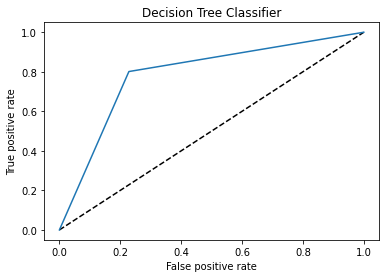

In [140]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Decision Tree Classifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Decision Tree Classifier")
plt.show()

# K-NEAREST NEIGHBOR

In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [142]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [143]:
predknn=knn.predict(x_test)

In [144]:
print(predknn)

[0. 1. 1. ... 1. 1. 1.]


# accuracy score ,confusion matrix,classification report

In [146]:
accknn=classification_report(y_test,predknn)

In [147]:
print(accknn)

              precision    recall  f1-score   support

         0.0       0.81      0.70      0.75      1586
         1.0       0.72      0.83      0.77      1519

    accuracy                           0.76      3105
   macro avg       0.77      0.76      0.76      3105
weighted avg       0.77      0.76      0.76      3105



In [148]:
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

[[1107  479]
 [ 262 1257]]
              precision    recall  f1-score   support

         0.0       0.81      0.70      0.75      1586
         1.0       0.72      0.83      0.77      1519

    accuracy                           0.76      3105
   macro avg       0.77      0.76      0.76      3105
weighted avg       0.77      0.76      0.76      3105



# AUC ROC CURVE

In [149]:
y_pred_prob=knn.predict_proba(x_test)[:,1]

In [150]:
y_pred_prob

array([0.4, 0.6, 0.8, ..., 1. , 1. , 0.8])

In [151]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [152]:
fpr

array([0.        , 0.04854981, 0.15510719, 0.30201765, 0.48738966,
       0.69167718, 1.        ])

In [153]:
tpr

array([0.        , 0.38512179, 0.6596445 , 0.8275181 , 0.94601712,
       0.98749177, 1.        ])

In [154]:
thresholds

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

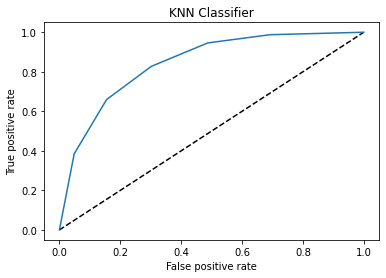

In [155]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="KNN Classifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("KNN Classifier")
plt.show()

# SUPPORT VECTOR

In [156]:
from sklearn.svm import SVC

In [157]:
svc=SVC(probability=True)

In [158]:
svc.fit(x_train,y_train)

SVC(probability=True)

In [159]:
predsvc=svc.predict(x_test)

In [160]:
print(predsvc)

[1. 0. 0. ... 1. 0. 0.]


# accuracy score ,confusion matrix,classification report

In [161]:
accsvc=classification_report(y_test,predsvc)

In [162]:
print(accsvc)

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      1586
         1.0       0.83      0.79      0.81      1519

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



In [163]:
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

[[1333  253]
 [ 325 1194]]
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      1586
         1.0       0.83      0.79      0.81      1519

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



# AUC ROC CURVE

In [165]:
y_pred_prob=svc.predict_proba(x_test)[:,1]

In [166]:
y_pred_prob

array([0.74626454, 0.18613628, 0.46200064, ..., 0.99706994, 0.44552493,
       0.43923371])

In [167]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [168]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.30517024e-04,
       6.30517024e-04, 1.26103405e-03, 1.26103405e-03, 2.52206810e-03,
       2.52206810e-03, 3.15258512e-03, 3.15258512e-03, 3.78310214e-03,
       3.78310214e-03, 4.41361917e-03, 4.41361917e-03, 5.04413619e-03,
       5.04413619e-03, 5.67465322e-03, 5.67465322e-03, 6.30517024e-03,
       6.30517024e-03, 6.93568726e-03, 6.93568726e-03, 7.56620429e-03,
       7.56620429e-03, 8.19672131e-03, 8.19672131e-03, 8.82723834e-03,
       8.82723834e-03, 9.45775536e-03, 9.45775536e-03, 1.00882724e-02,
       1.00882724e-02, 1.07187894e-02, 1.07187894e-02, 1.13493064e-02,
       1.13493064e-02, 1.19798235e-02, 1.19798235e-02, 1.26103405e-02,
       1.26103405e-02, 1.32408575e-02, 1.32408575e-02, 1.45018916e-02,
       1.45018916e-02, 1.51324086e-02, 1.51324086e-02, 1.57629256e-02,
       1.57629256e-02, 1.63934426e-02, 1.63934426e-02, 1.70239596e-02,
       1.70239596e-02, 1.76544767e-02, 1.76544767e-02, 1.82849937e-02,
      

In [169]:
tpr

array([0.00000000e+00, 6.58327847e-04, 3.29163924e-01, 3.29163924e-01,
       3.29822251e-01, 3.29822251e-01, 3.52205398e-01, 3.52205398e-01,
       3.54180382e-01, 3.54180382e-01, 3.70638578e-01, 3.70638578e-01,
       3.71955234e-01, 3.71955234e-01, 3.79196840e-01, 3.79196840e-01,
       3.85780118e-01, 3.85780118e-01, 4.01579987e-01, 4.01579987e-01,
       4.16721527e-01, 4.16721527e-01, 4.23963134e-01, 4.23963134e-01,
       4.30546412e-01, 4.30546412e-01, 4.33179724e-01, 4.33179724e-01,
       4.43712969e-01, 4.43712969e-01, 4.47004608e-01, 4.47004608e-01,
       4.50954575e-01, 4.50954575e-01, 4.54246215e-01, 4.54246215e-01,
       4.56879526e-01, 4.56879526e-01, 4.70704411e-01, 4.70704411e-01,
       4.72021066e-01, 4.72021066e-01, 4.74654378e-01, 4.74654378e-01,
       4.76629361e-01, 4.76629361e-01, 4.79921001e-01, 4.79921001e-01,
       4.80579329e-01, 4.80579329e-01, 4.81895984e-01, 4.81895984e-01,
       4.83212640e-01, 4.83212640e-01, 4.89795918e-01, 4.89795918e-01,
      

In [170]:
thresholds

array([1.99999986, 0.99999986, 0.94188314, 0.94147573, 0.94130354,
       0.94103591, 0.93369991, 0.93334761, 0.93242865, 0.93165207,
       0.92538144, 0.92527984, 0.92525152, 0.92515074, 0.92246029,
       0.92229546, 0.9192476 , 0.91918457, 0.91459081, 0.91417077,
       0.90763549, 0.90761033, 0.90505416, 0.90493195, 0.90320319,
       0.90317924, 0.90148991, 0.90145691, 0.89748149, 0.89746486,
       0.89587645, 0.89570069, 0.89399395, 0.89380905, 0.89180516,
       0.89177054, 0.89092496, 0.89066131, 0.88460472, 0.88456868,
       0.88346734, 0.88296634, 0.88083002, 0.8802399 , 0.87927529,
       0.87896527, 0.87826756, 0.87816116, 0.8781594 , 0.87788347,
       0.87600951, 0.87591721, 0.87565606, 0.8751497 , 0.8696697 ,
       0.86956879, 0.86520203, 0.86514891, 0.86313236, 0.86268114,
       0.8616561 , 0.86085296, 0.85814156, 0.85786798, 0.85588729,
       0.85569957, 0.85166688, 0.85150724, 0.8514354 , 0.8508541 ,
       0.84909654, 0.84873242, 0.84676937, 0.84669566, 0.84536

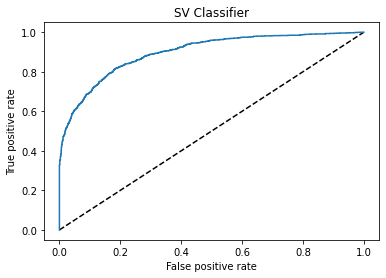

In [171]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Support Vector Classifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("SV Classifier")
plt.show()

# RANDOMFOREST

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
rfc=RandomForestClassifier()

In [175]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [176]:
predrfc=rfc.predict(x_test)

In [177]:
print(predrfc)

[1. 0. 1. ... 1. 1. 0.]


# accuracy score ,confusion matrix,classification report

In [178]:
accrfc=classification_report(y_test,predrfc)

In [179]:
print(accrfc)

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      1586
         1.0       0.88      0.80      0.83      1519

    accuracy                           0.85      3105
   macro avg       0.85      0.84      0.84      3105
weighted avg       0.85      0.85      0.84      3105



In [180]:
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

[[1414  172]
 [ 308 1211]]
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      1586
         1.0       0.88      0.80      0.83      1519

    accuracy                           0.85      3105
   macro avg       0.85      0.84      0.84      3105
weighted avg       0.85      0.85      0.84      3105



# AUC ROC CURVE

In [181]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]

In [182]:
y_pred_prob

array([0.9 , 0.34, 0.98, ..., 0.99, 0.56, 0.3 ])

In [183]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [184]:
fpr

array([0.00000000e+00, 6.30517024e-04, 6.30517024e-04, 6.30517024e-04,
       6.30517024e-04, 6.30517024e-04, 6.30517024e-04, 1.26103405e-03,
       3.15258512e-03, 3.78310214e-03, 4.41361917e-03, 5.04413619e-03,
       5.04413619e-03, 6.30517024e-03, 6.30517024e-03, 8.19672131e-03,
       8.19672131e-03, 9.45775536e-03, 1.38713745e-02, 1.38713745e-02,
       1.51324086e-02, 1.76544767e-02, 1.89155107e-02, 2.01765448e-02,
       2.20680958e-02, 2.33291299e-02, 2.52206810e-02, 2.77427491e-02,
       3.08953342e-02, 3.59394704e-02, 3.84615385e-02, 4.16141236e-02,
       4.47667087e-02, 4.66582598e-02, 5.10718789e-02, 5.42244641e-02,
       5.54854981e-02, 5.67465322e-02, 6.11601513e-02, 6.43127364e-02,
       6.87263556e-02, 7.37704918e-02, 7.69230769e-02, 8.13366961e-02,
       8.51197982e-02, 8.76418663e-02, 9.20554855e-02, 9.64691047e-02,
       1.02774275e-01, 1.08448928e-01, 1.14123581e-01, 1.22320303e-01,
       1.29255990e-01, 1.35561160e-01, 1.41866330e-01, 1.47540984e-01,
      

In [185]:
tpr

array([0.        , 0.21658986, 0.3074391 , 0.37129691, 0.41211323,
       0.44963792, 0.47333772, 0.49440421, 0.51349572, 0.53127057,
       0.54509546, 0.55497038, 0.56616195, 0.57274523, 0.58130349,
       0.58788677, 0.59842001, 0.60566162, 0.62080316, 0.62936142,
       0.63396972, 0.640553  , 0.64845293, 0.6524029 , 0.6596445 ,
       0.6642528 , 0.67017775, 0.67281106, 0.67939434, 0.68861093,
       0.69519421, 0.6998025 , 0.70506912, 0.70901909, 0.71691903,
       0.71955234, 0.72284398, 0.72876893, 0.73074391, 0.73469388,
       0.74127716, 0.74720211, 0.75115207, 0.76168532, 0.76629361,
       0.77287689, 0.77682686, 0.78341014, 0.78736011, 0.79723502,
       0.80250165, 0.80710994, 0.81171824, 0.8156682 , 0.82290981,
       0.82554312, 0.83080974, 0.83475971, 0.83870968, 0.84595128,
       0.85055958, 0.85253456, 0.85648453, 0.86372614, 0.86833443,
       0.87491771, 0.87886768, 0.88545095, 0.89335089, 0.89861751,
       0.90388413, 0.90585912, 0.91178407, 0.91770902, 0.92034

In [186]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 ,
       0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01, 0.  ])

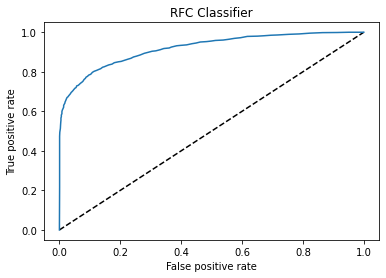

In [187]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random Forest Classifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("RFC Classifier")
plt.show()

DIFFERENT ALGORITHMS APPLIED AND GOT ACCURACY SCORES AS
LOGISTIC REGRESSION-71,DECISION TREE-79,KNN-76,SVC-81 AND RFC-85
NOW WE WANT TO ANALYSE CROSS VALIDATION MEAN SCORES

# CROSS VALIDATION MEAN SCORE

In [188]:
from sklearn.model_selection import cross_val_score

LOGISTIC REGRESSOR

In [189]:
print(cross_val_score(lg,x1,y1,cv=5).mean())

0.7121211908948055


DTC

In [190]:
print(cross_val_score(dtc,x1,y1,cv=5).mean())

0.7826801437367348


KNN

In [191]:
print(cross_val_score(knn,x1,y1,cv=5).mean())

0.7701062148159045


SVC

In [192]:
print(cross_val_score(svc,x1,y1,cv=5).mean())

0.8013286074861716


RFC

In [193]:
print(cross_val_score(rfc,x1,y1,cv=5).mean())

0.8192129503155623


THE LEAST DIFFERENCE OF ACCURACY SCORE AND CROSS VALIDATION IS ZERO IN LOGISTIC REGRESSION :71-71=0

# HYPER PARAMETRE TUNING:LOGISTIC REGRESSOR

In [194]:
from sklearn.model_selection import GridSearchCV

In [195]:
parameter={'C':[0.001,0.01,0.1,1.],
          'penalty':['l1','l2'],
          'tol':[0.001,0.01,0.1,1.],
          'intercept_scaling':[0.01,0.1,1.]}

In [196]:
GCV=GridSearchCV(LogisticRegression(),parameter,cv=5)

In [197]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0],
                         'intercept_scaling': [0.01, 0.1, 1.0],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.001, 0.01, 0.1, 1.0]})

In [198]:
GCV.best_params_

{'C': 0.01, 'intercept_scaling': 0.01, 'penalty': 'l2', 'tol': 0.001}

passing this best parameter values to model

In [199]:
Churn_model=LogisticRegression(C = 0.01, intercept_scaling = 0.01, penalty = 'l2', tol = 0.001)

In [200]:
Churn_model.fit(x_train,y_train)

LogisticRegression(C=0.01, intercept_scaling=0.01, tol=0.001)

In [201]:
Finalpred=Churn_model.predict(x_test)

In [202]:
print(Finalpred)

[1. 1. 0. ... 1. 1. 1.]


In [203]:
Finalacc=accuracy_score(y_test,Finalpred)

In [204]:
print(Finalacc)

0.7091787439613526


we are getting 70.9% accuracy

# conclusion and saving

In [205]:
conclusion=pd.DataFrame([Churn_model.predict(x_test)[:],Finalpred[:]],index=["Predicted","Orginal"])

In [206]:
conclusion

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted   1.0   1.0   0.0   1.0   1.0   0.0   1.0   0.0   1.0   1.0  ...   
Orginal     1.0   1.0   0.0   1.0   1.0   0.0   1.0   0.0   1.0   1.0  ...   

           3095  3096  3097  3098  3099  3100  3101  3102  3103  3104  
Predicted   1.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0  
Orginal     1.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0  

[2 rows x 3105 columns]

In [207]:
import joblib

In [208]:
joblib.dump(Churn_model,"telecom_churn_model.pk1")

['telecom_churn_model.pk1']